# Importing libraries 

In [3]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# Version of PyTorch 

In [2]:
torch.__version__

'2.0.1+cu118'

In [6]:
X = np.array([1,2,3,4,5,6,7,8,9,10],dtype=float)
y = np.array([1,4,9,16,25,36,49,64,81,100],dtype=float)

In [8]:
X[:10], y[:10]

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.]))

# Spliting the data into training set 

In [11]:
# Create train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(8, 8, 2, 2)

# Visulaize 

In [12]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data, train_labels, c='b', s=5, label='Training data')
    
    plt.scatter(test_data, test_labels, c='g', s=5, label='Testing data')
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=5, label='Predictions')
        
    plt.legend(prop={'size': 14})

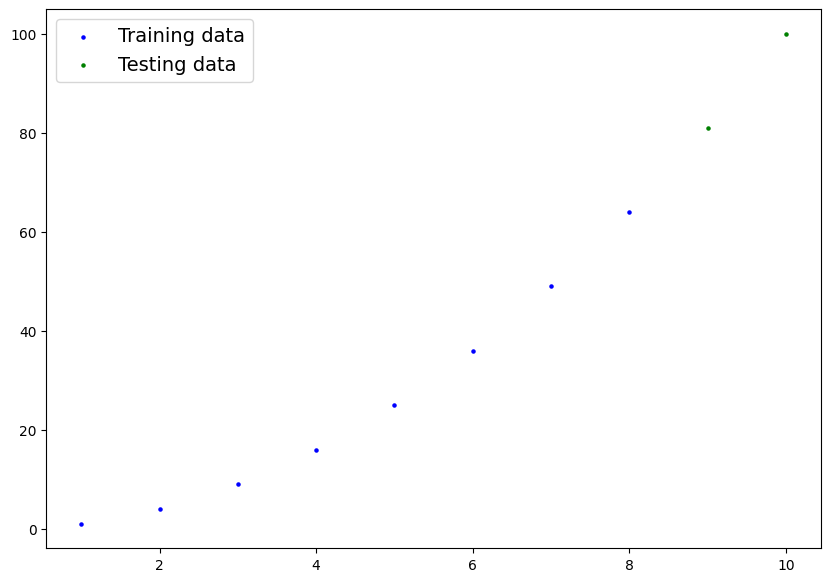

In [13]:
plot_predictions()

# Build model 

In [14]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.X = nn.Parameter(torch.randn(1,
                                         dtype=torch.float),
                             requires_grad=True)
        self.y = nn.Parameter(torch.randn(1,
                                         dtype=torch.float),
                             requires_grad=True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return y

In [15]:
torch.manual_seed(42)

model_1 = LinearRegressionModel()

In [16]:
model_1.state_dict()

OrderedDict([('X', tensor([0.3367])), ('y', tensor([0.1288]))])

# Make predictions using torch.inference_mode() 

In [17]:
with torch.inference_mode():
    y_preds = model_1(X_test)

In [18]:
y_preds

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

In [19]:
print(f'Number of testing samples: {len(X_test)}')
print(f'Number of predictions made: {len(y_preds)}')
print(f'Predicted values: \n{y_preds}')

Number of testing samples: 2
Number of predictions made: 10
Predicted values: 
[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]


ValueError: x and y must be the same size

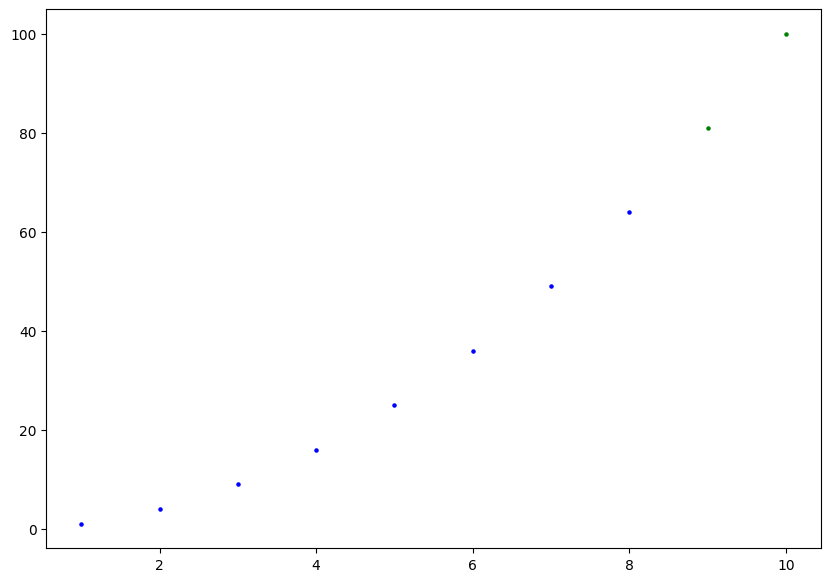

In [20]:
plot_predictions(predictions=y_preds)

# Importing the libraries 

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.rand(3,3)

tensor([[0.0413, 0.2476, 0.7550],
        [0.4060, 0.2180, 0.2868],
        [0.5743, 0.6079, 0.1303]])

# Data 

In [3]:
X = np.array([1,2,3,4,5,6,7,8,9,10],dtype=np.float32)
y = np.array([1,4,9,16,25,36,49,64,81,100],dtype=np.float32)

# Converting the numpy into tensors

In [4]:
X = torch.from_numpy(X.reshape(-1, 1)).float()
y = torch.from_numpy(y.reshape(-1, 1)).float()

# Creating the Linear regression class 

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self,x):
        return self.linear(x)

# Linear regression model 

In [6]:
model = LinearRegressionModel()

# loss and optimizer function 

In [7]:
losses = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Model training 

In [8]:
num_epochs = 200

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = losses(outputs, y)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")



Epoch [10/200], Loss: 156.4174
Epoch [20/200], Loss: 148.0531
Epoch [30/200], Loss: 140.3639
Epoch [40/200], Loss: 133.2956
Epoch [50/200], Loss: 126.7977
Epoch [60/200], Loss: 120.8244
Epoch [70/200], Loss: 115.3333
Epoch [80/200], Loss: 110.2854
Epoch [90/200], Loss: 105.6450
Epoch [100/200], Loss: 101.3792
Epoch [110/200], Loss: 97.4578
Epoch [120/200], Loss: 93.8528
Epoch [130/200], Loss: 90.5390
Epoch [140/200], Loss: 87.4926
Epoch [150/200], Loss: 84.6921
Epoch [160/200], Loss: 82.1177
Epoch [170/200], Loss: 79.7510
Epoch [180/200], Loss: 77.5755
Epoch [190/200], Loss: 75.5755
Epoch [200/200], Loss: 73.7370


# Predicting the model 

In [12]:
x_test = torch.tensor([[12.0]])

#model.eval()

with torch.no_grad():
    y_pred = model(x_test)
    
print('Predicted value: ', y_pred.item())

Predicted value:  108.70603942871094


In [13]:
model.eval()

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)